<a href="https://colab.research.google.com/github/bademirci/machine_learning/blob/main/Ridge_Lasso_Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Batuhan Demirci - 070190155 - Data Analytics Homework 1**
I have chosen dataset contains the prices and other attributes of almost 54,000 diamonds.

**price** : price in US dollars (\$326--\$18,823)

**carat** : weight of the diamond (0.2--5.01)

**cut** : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** : diamond colour, from J (worst) to D (best)

**clarity** : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** : length in mm (0--10.74)

**y** : width in mm (0--58.9)

**z** : depth in mm (0--31.8)

**depth** : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** : width of top of diamond relative to widest point (43--95)

In [ ]:
import pandas as pd
import numpy as np



In [ ]:
data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.drop(['Unnamed: 0',"clarity"], axis = 1, inplace = True)

"From describe, I realized that x,y,z have 0 values. I removed them from DataFrame."

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
data = data[data.x != 0]
data = data[data.y != 0]
data = data[data.z != 0]

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

In [ ]:
data["fair"]=np.where(data["cut"].str.contains("Fair"),1,0)
data["good"]=np.where(data["cut"].str.contains("Good"),1,0)
data["vgood"]=np.where(data["cut"].str.contains("Very Good"),1,0)
data["prem"]=np.where(data["cut"].str.contains("Premium"),1,0)
data["ideal"]=np.where(data["cut"].str.contains("Ideal"),1,0)
#cut values are categorized.

data["color_e"]=np.where(data["color"].str.contains("E"),1,0)
data["color_i"]=np.where(data["color"].str.contains("I"),1,0)
data["color_j"]=np.where(data["color"].str.contains("J"),1,0)
data["color_h"]=np.where(data["color"].str.contains("H"),1,0)
data["color_f"]=np.where(data["color"].str.contains("F"),1,0)
data["color_g"]=np.where(data["color"].str.contains("G"),1,0)
data["color_d"]=np.where(data["color"].str.contains("D"),1,0)

"color values are categorized."

'color values are categorized.'

##New DataFrame


In [ ]:
data.head(15)

,carat,cut,color,depth,table,price,x,y,z,fair,good,vgood,prem,ideal,color_e,color_i,color_j,color_h,color_f,color_g,color_d
0,0.23,Ideal,E,61.5,55.0,326,3.95,3.98,2.43,0,0,0,0,1,1,0,0,0,0,0,0
1,0.21,Premium,E,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,1,0,0,0,0,0,0
2,0.23,Good,E,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,1,0,0,0,0,0,0
3,0.29,Premium,I,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,1,0,0,0,0,0
4,0.31,Good,J,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,1,0,0,0,0
5,0.24,Very Good,J,62.8,57.0,336,3.94,3.96,2.48,0,1,1,0,0,0,0,1,0,0,0,0
6,0.24,Very Good,I,62.3,57.0,336,3.95,3.98,2.47,0,1,1,0,0,0,1,0,0,0,0,0
7,0.26,Very Good,H,61.9,55.0,337,4.07,4.11,2.53,0,1,1,0,0,0,0,0,1,0,0,0
8,0.22,Fair,E,65.1,61.0,337,3.87,3.78,2.49,1,0,0,0,0,1,0,0,0,0,0,0
9,0.23,Very Good,H,59.4,61.0,338,4.00,4.05,2.39,0,1,1,0,0,0,0,0,1,0,0,0


In [ ]:
import statsmodels.api as sm
X = data.loc[:,['carat', 'depth', 'table', 'x', 'y', 'z',
       'fair', 'good', 'vgood', 'prem', 'ideal', 'color_e', 'color_i',
       'color_j', 'color_h', 'color_f', 'color_g', 'color_d']]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X=sm.add_constant(X)

In [ ]:
y = data["price"]
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 2.444e+04
Date:                Fri, 31 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:20:54   Log-Likelihood:            -4.6665e+05
No. Observations:               53920   AIC:                         9.333e+05
Df Residuals:                   53903   BIC:                         9.335e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8759.0820    353.779     24.759      0.000    8065.671    9452.493
carat       1.168e+04     62.935    185.656      0.000    1.16e+04    1.18e+04
depth       -117.4882      5.686    -20.661      0.000    -128.633    -106.343
table        -40.0449      3.575    -11.201      0.000     -47.052     -33.038
x          -1521.0276     42.761    -35.570      0.000   -1604.840   -1437.215
y             63.9972     23.942      2.673      0.008      17.070     110.925
z            -70.2846     46.590     -1.509      0.131    -161.601      21.032
fair        1271.0290    101.378     12.538      0.000    1072.328    1469.730
good        2250.9256     91.646     24.561      0.000    2071.300    2430.552
vgood        291.9387     23.934     12.197      0.000     245.027     338.850
prem        2486.2289     86.764     28.655      0.000    2316.170    2656.288
ideal       2750.8984     81.698     33.672      0.000    2590.770    2911.027
color_e     1741.6611     52.227     33.348      0.000    1639.295    1844.027
color_i      704.1069     53.536     13.152      0.000     599.176     809.038
color_j     -152.4431     55.845     -2.730      0.006    -261.899     -42.987
color_h     1088.7878     52.730     20.648      0.000     985.436    1192.140
color_f     1792.9803     52.311     34.275      0.000    1690.450    1895.510
color_g     1740.9329     52.092     33.420      0.000    1638.831    1843.035
color_d     1843.0561     52.965     34.797      0.000    1739.244    1946.868
==============================================================================
Omnibus:                    12887.616   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           592421.525
Skew:                           0.329   Prob(JB):                         0.00
Kurtosis:                      19.225   Cond. No.                     7.18e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.52e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range (len(X.columns))]

print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


    feature        VIF
0     const   0.000000
1     carat  24.883382
2     depth   1.856533
3     table   1.785378
4         x  64.126529
5         y  20.854071
6         z  29.982134
7      fair        inf
8      good        inf
9     vgood   2.787327
10     prem        inf
11    ideal        inf
12  color_e        inf
13  color_i        inf
14  color_j        inf
15  color_h        inf
16  color_f        inf
17  color_g        inf
18  color_d        inf


##"Here according to VIF, there is multicollinearity between x,y,z and carat."

Text(0.5, 1.0, 'Heteroskedasticity Problem !!!')

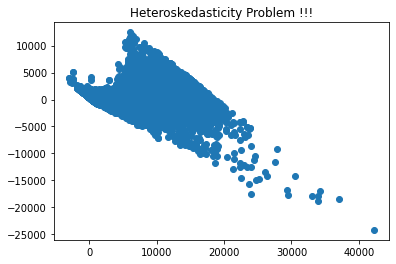

In [ ]:
import matplotlib.pyplot as plt
x = model.fittedvalues
y = model.resid
plt.scatter(x,y)
plt.title("Heteroskedasticity Problem !!!")

##"I detected Heteroskedasticity and tried to remove it \n with using logY instead of y in model."

In [ ]:
y_new = np.log(data["price"])
new_lm = sm.OLS(y_new,X)
new_model = new_lm.fit()
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 6.275e+04
Date:                Fri, 31 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:24:29   Log-Likelihood:                 2970.6
No. Observations:               53920   AIC:                            -5907.
Df Residuals:                   53903   BIC:                            -5756.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4739      0.058    -25.248      0.0

##"According to p values above , all coefficients are significant."

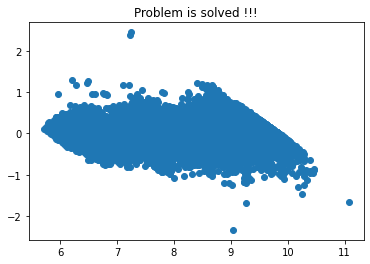

In [ ]:
x1 =new_model.fittedvalues
y1= new_model.resid
plt.scatter(x1,y1)
plt.title("Problem is solved !!!")
plt.show()


### LASSO REGRESSION ####

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV 
from sklearn.metrics import mean_squared_error 

##"I did not use logY because coefficients are near to the zero."

In [ ]:
X = data.loc[:,['carat', 'depth', 'table', 'x', 'y', 'z',
       'fair', 'good', 'vgood', 'prem', 'ideal', 'color_e', 'color_i',
       'color_j', 'color_h', 'color_f', 'color_g', 'color_d']]
y = data["price"]
X= sm.add_constant(X)
lasso_model = Lasso(alpha = 0.3).fit(X, y)

lasso_cv_model = LassoCV(alphas = None, cv = 10, 
                         max_iter = 10000, 
                         normalize = True)
lasso_cv_model.fit(X,y)
print(lasso_cv_model.alpha_)
lasso_model
print(lasso_model.coef_)
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)
lasso_tuned.fit(X, y)
y_pred = lasso_tuned.predict(X)
print("MSE:",np.sqrt(mean_squared_error(y, y_pred)))
lasso_model = Lasso(alpha = lasso_cv_model.alpha_).fit(X, y)

lasso_model
print("Lasso Model Coefficients:",lasso_model.coef_) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


0.015824738420279864
[    0.         11634.3333026   -118.06838093   -40.47072322
 -1497.45073947    54.34739355   -60.44260063 -1202.25501174
  -226.58431259   283.65939511     0.           264.42121611
     0.         -1031.5142939  -1884.6760256   -648.82462151
    50.28583294     0.            99.80657228]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.298e+09, tolerance: 8.572e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


MSE: 1387.8033231857898
Lasso Model Coefficients: [ 0.00000000e+00  1.16815139e+04 -1.17518552e+02 -4.00675630e+01
 -1.51977834e+03  6.34891614e+01 -6.97727401e+01 -1.21451721e+03
 -2.34844354e+02  2.91502275e+02  4.96294708e-05  2.64656550e+02
  1.16896143e+02 -9.20306450e+02 -1.77667853e+03 -5.35738842e+02
  1.68177762e+02  1.16170776e+02  2.18211192e+02]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.298e+09, tolerance: 8.572e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


##"There is not so much different between OLS and Lasso coefficients"

"************* RIDGE REGRESSION   ***************************************"

In [ ]:
from sklearn.linear_model import Ridge

[    0.         11673.99976539  -117.31035486   -40.03779762
 -1516.68448768    63.91506373   -70.44138133  -918.60883354
    61.09583577   291.9979642    296.42507706   561.08792072
   490.19620595  -546.96322669 -1403.22585928  -162.49326591
   541.45017645   489.49290328   591.54306626]


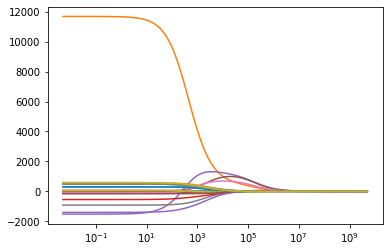

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')
0.005


In [ ]:
ridge_model = Ridge(alpha = 0.4).fit(X, y)  
print(ridge_model.coef_)
from sklearn.linear_model import RidgeCV
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []
for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X, y) 
    katsayilar.append(ridge_model.coef_)


ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 
plt.show()
from sklearn.linear_model import RidgeCV                           
ridge_cv=RidgeCV(alphas=lambdalar, scoring="neg_mean_squared_error", normalize=True) 
print(ridge_cv.fit(X,y))
print(ridge_cv.alpha_)      
ridge_model = Ridge(alpha = ridge_cv.alpha_).fit(X, y)           